In [5]:
!pip install pandas
!pip install matplotlib

  Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl.metadata (52 kB)
  Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl.metadata (5.5 kB)
  Using cached cycler-0.12.1-py3-none-any.whl.metadata (3.8 kB)
  Using cached fonttools-4.61.1-cp312-cp312-macosx_10_13_universal2.whl.metadata (114 kB)
  Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl.metadata (6.3 kB)
Using cached matplotlib-3.10.8-cp312-cp312-macosx_11_0_arm64.whl (8.1 MB)
Using cached contourpy-1.3.3-cp312-cp312-macosx_11_0_arm64.whl (273 kB)
Using cached cycler-0.12.1-py3-none-any.whl (8.3 kB)
Using cached fonttools-4.61.1-cp312-cp312-macosx_10_13_universal2.whl (2.9 MB)
Using cached kiwisolver-1.4.9-cp312-cp312-macosx_11_0_arm64.whl (64 kB)
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.7/4.7 MB 6.2 MB/s  0:00:00 eta 0:00:01
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 7/7 [matplotlib]7 [matplotlib]


In [10]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

pd.set_option('display.max_columns', 200)
pd.set_option('display.max_rows', 200)

In [11]:
df_ath = pd.read_csv('athlete_events.csv')
df_ath.head()

,ID,Name,Sex,Age,Height,Weight,Team,NOC,Games,Year,Season,City,Sport,Event,Medal
0,1,A Dijiang,M,24.0,180.0,80.0,China,CHN,1992 Summer,1992,Summer,Barcelona,Basketball,Basketball Men's Basketball,NaN
1,2,A Lamusi,M,23.0,170.0,60.0,China,CHN,2012 Summer,2012,Summer,London,Judo,Judo Men's Extra-Lightweight,NaN
2,3,Gunnar Nielsen Aaby,M,24.0,NaN,NaN,Denmark,DEN,1920 Summer,1920,Summer,Antwerpen,Football,Football Men's Football,NaN
3,4,Edgar Lindenau Aabye,M,34.0,NaN,NaN,Denmark/Sweden,DEN,1900 Summer,1900,Summer,Paris,Tug-Of-War,Tug-Of-War Men's Tug-Of-War,Gold
4,5,Christine Jacoba Aaftink,F,21.0,185.0,82.0,Netherlands,NED,1988 Winter,1988,Winter,Calgary,Speed Skating,Speed Skating Women's 500 metres,NaN


In [13]:
df_ath.info()

# Кол-во непропущенных значений по каждому столбцу
non_null = df_ath.count().sort_values()
display(non_null)

# Кол-во пропусков
missing = df_ath.isna().sum().sort_values(ascending=False)
missing = missing[missing > 0]
print("Столбцы с пропусками:")
display(missing)

if len(missing) > 0:
    print(f"Больше всего пропусков в столбце: {missing.index[0]} (пропусков: {missing.iloc[0]})")

<class 'pandas.DataFrame'>
RangeIndex: 271116 entries, 0 to 271115
Data columns (total 15 columns):
 #   Column  Non-Null Count   Dtype  
---  ------  --------------   -----  
 0   ID      271116 non-null  int64  
 1   Name    271116 non-null  str    
 2   Sex     271116 non-null  str    
 3   Age     261642 non-null  float64
 4   Height  210945 non-null  float64
 5   Weight  208241 non-null  float64
 6   Team    271116 non-null  str    
 7   NOC     271116 non-null  str    
 8   Games   271116 non-null  str    
 9   Year    271116 non-null  int64  
 10  Season  271116 non-null  str    
 11  City    271116 non-null  str    
 12  Sport   271116 non-null  str    
 13  Event   271116 non-null  str    
 14  Medal   39783 non-null   str    
dtypes: float64(3), int64(2), str(10)
memory usage: 31.0 MB


Medal      39783
Weight    208241
Height    210945
Age       261642
ID        271116
Name      271116
Sex       271116
Team      271116
NOC       271116
Games     271116
Year      271116
Season    271116
City      271116
Sport     271116
Event     271116
dtype: int64

Столбцы с пропусками:


Medal     231333
Weight     62875
Height     60171
Age         9474
dtype: int64

Больше всего пропусков в столбце: Medal (пропусков: 231333)


In [14]:
df_ath[['Age','Height','Weight']].describe()

,Age,Height,Weight
count,261642.000000,210945.000000,208241.000000
mean,25.556898,175.338970,70.702393
std,6.393561,10.518462,14.348020
min,10.000000,127.000000,25.000000
25%,21.000000,168.000000,60.000000
50%,24.000000,175.000000,70.000000
75%,28.000000,183.000000,79.000000
max,97.000000,226.000000,214.000000


In [15]:
df_1992 = df_ath[df_ath['Year'] == 1992].copy()
min_age_1992 = df_1992['Age'].min()
min_age_1992

np.float64(11.0)

In [16]:
youngest_1992 = (
    df_1992[df_1992['Age'] == min_age_1992][['Name','Sex','Age','Sport','Event','Team','NOC','Games']]
    .drop_duplicates()
    .sort_values(['Name','Sport','Event'])
)
youngest_1992

,Name,Sex,Age,Sport,Event,Team,NOC,Games
73461,Carlos Bienvenido Front Barrera,M,11.0,Rowing,Rowing Men's Coxed Eights,Spain,ESP,1992 Summer


In [17]:
sports_all = sorted(df_ath['Sport'].dropna().unique())
print("Всего видов спорта:", len(sports_all))
sports_all

Всего видов спорта: 66


['Aeronautics',
 'Alpine Skiing',
 'Alpinism',
 'Archery',
 'Art Competitions',
 'Athletics',
 'Badminton',
 'Baseball',
 'Basketball',
 'Basque Pelota',
 'Beach Volleyball',
 'Biathlon',
 'Bobsleigh',
 'Boxing',
 'Canoeing',
 'Cricket',
 'Croquet',
 'Cross Country Skiing',
 'Curling',
 'Cycling',
 'Diving',
 'Equestrianism',
 'Fencing',
 'Figure Skating',
 'Football',
 'Freestyle Skiing',
 'Golf',
 'Gymnastics',
 'Handball',
 'Hockey',
 'Ice Hockey',
 'Jeu De Paume',
 'Judo',
 'Lacrosse',
 'Luge',
 'Military Ski Patrol',
 'Modern Pentathlon',
 'Motorboating',
 'Nordic Combined',
 'Polo',
 'Racquets',
 'Rhythmic Gymnastics',
 'Roque',
 'Rowing',
 'Rugby',
 'Rugby Sevens',
 'Sailing',
 'Shooting',
 'Short Track Speed Skating',
 'Skeleton',
 'Ski Jumping',
 'Snowboarding',
 'Softball',
 'Speed Skating',
 'Swimming',
 'Synchronized Swimming',
 'Table Tennis',
 'Taekwondo',
 'Tennis',
 'Trampolining',
 'Triathlon',
 'Tug-Of-War',
 'Volleyball',
 'Water Polo',
 'Weightlifting',
 'Wrestling'

In [18]:
# Средний рост теннисисток на играх 2000 года
tennis_f_2000 = df_ath[
    (df_ath['Year'] == 2000) &
    (df_ath['Sex'] == 'F') &
    (df_ath['Sport'] == 'Tennis')
]
tennis_f_2000['Height'].mean()

np.float64(171.792)

In [19]:
# Сколько золотых медалей в настольном теннисе выиграл Китай на ОИ 2008
china_tt_2008_gold = df_ath[
    (df_ath['Year'] == 2008) &
    (df_ath['Sport'] == 'Table Tennis') &
    (df_ath['NOC'] == 'CHN') &
    (df_ath['Medal'] == 'Gold')
]
china_tt_2008_gold.shape[0]

8

In [20]:
# Изменение количества видов спорта: Summer 2004 vs Summer 1988
def n_sports_summer(year: int) -> int:
    return df_ath[(df_ath['Season'] == 'Summer') & (df_ath['Year'] == year)]['Sport'].nunique()

n_1988 = n_sports_summer(1988)
n_2004 = n_sports_summer(2004)

print("1988 Summer:", n_1988)
print("2004 Summer:", n_2004)
print("Разница (2004 - 1988):", n_2004 - n_1988)

1988 Summer: 27
2004 Summer: 34
Разница (2004 - 1988): 7


In [21]:
# Гистограмма возраста мужчин-керлингистов на ОИ 2014
curling_m_2014_age = df_ath[
    (df_ath['Year'] == 2014) &
    (df_ath['Sport'] == 'Curling') &
    (df_ath['Sex'] == 'M')
]['Age'].dropna()

curling_m_2014_age.describe()

count    44.000000
mean     29.454545
std       6.078764
min      22.000000
25%      25.000000
50%      28.000000
75%      31.500000
max      48.000000
Name: Age, dtype: float64

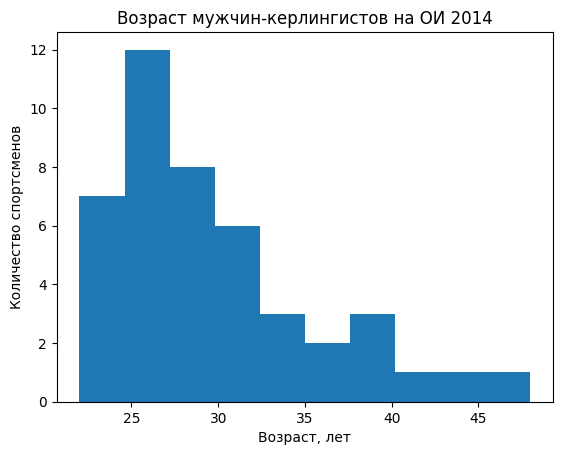

In [22]:
plt.figure()
plt.hist(curling_m_2014_age)  # параметры по умолчанию
plt.title('Возраст мужчин-керлингистов на ОИ 2014')
plt.xlabel('Возраст, лет')
plt.ylabel('Количество спортсменов')
plt.show()

In [23]:
df_winter_2006 = df_ath[(df_ath['Year'] == 2006) & (df_ath['Season'] == 'Winter')].copy()

medals_2006 = df_winter_2006[df_winter_2006['Medal'].notna() & (df_winter_2006['Medal'] != 'NA')]

by_noc = medals_2006.groupby('NOC').agg(
    medals_count=('Medal', 'size'),
    avg_age=('Age', 'mean')
).sort_values('medals_count', ascending=False)

by_noc

,medals_count,avg_age
NOC,,
CAN,69,27.449275
SWE,64,27.187500
GER,54,28.777778
USA,52,24.519231
FIN,41,28.195122
RUS,41,28.024390
AUT,30,27.333333
CZE,27,29.814815
ITA,25,29.360000


In [24]:
# Winter 2006: pivot_table по стране и медали, NaN заменить на 0
pivot_medals = pd.pivot_table(
    medals_2006,
    index='NOC',
    columns='Medal',
    values='ID',       # считаем кол-во строк
    aggfunc='count',
    fill_value=0
).astype(int)

pivot_medals

Medal,Bronze,Gold,Silver
NOC,,,
AUS,1,1,0
AUT,7,16,7
BLR,0,0,1
BUL,0,0,1
CAN,11,30,28
CHN,6,2,5
CRO,0,1,2
CZE,24,1,2
EST,0,3,0
